In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import linear_model
import warnings
%matplotlib inline
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [4]:
print("¡Hola, Proyecto Final del Curso!")

¡Hola, Proyecto Final del Curso!


In [ ]:
#Revisamos el contenido de la Base de Datos principal
df_original=pd.read_csv("/content/IngresoReservas.csv",encoding='latin1',sep=';')
df_prueba=pd.read_csv("/content/IngresoReservas.csv",encoding='latin1',sep=';')
df=pd.read_csv("/content/IngresoReservas.csv",encoding='latin1',sep=';')
df.head()

,Nro.,Booking No.,EC,POL,POD,T/S Port,Traffic,Shipper,Broker,Condition,...,OUT DEPOT,IN DEPOT,COMMODITY,FECHA,DIA,MES,AÑO,VESSEL,VIAJE,SERVICIO
0,1,169AA01481,GM,PECLL,JPTYO,TWKHH,FAREAST,MINSUR S. A.,C. STEINWEG (PERU) S.A.C.,PREPAID,...,IMUPESA,RANSA,TIN INGOTS,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
1,2,169AA01565,GM,PECLL,CNDLC,HKHKG,FAREAST,METCO TRADING S.A.C.,C. STEINWEG (PERU) S.A.C.,PREPAID,...,NEPTUNIA,IMPALA,COPPER CONCENTRATES,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
2,3,169AA01855,GM,PECLL,JPYOK,TWKHH,FAREAST,MINSUR S. A.,LA HANSEATICA S.A.,PREPAID,...,NEPTUNIA,RANSA,TIN INGOTS,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
3,4,169AA01911,EQ,PECLL,CNYTN,CNYTN,FAREAST,WAN HAI LINES PERU SAC,WAN HAI LINES PERU SAC,PREPAID,...,DPW,DPW,EMPTY CONTAINER,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
4,5,169AA01912,AL,PECLL,HKHKG,HKHKG,FAREAST,RVR AGRO E.I.R.L.,RVR AGRO E.I.R.L.,PREPAID,...,NEPTUNIA,APM DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,CANCELADO


In [ ]:
df['20 ST '].describe()

count    2915.000000
mean        4.132419
std        13.581282
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       231.000000
Name: 20 ST , dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


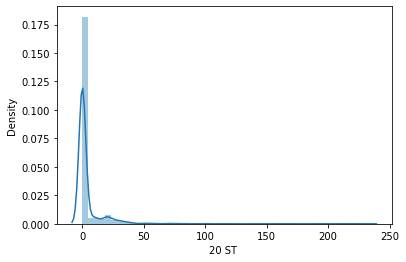

In [ ]:
sns.distplot(df['20 ST '])

In [ ]:
df['20 ST '].skew()

7.643072339349589

El valor prederteminado de "skew" debe ser 0

In [ ]:
df['20 ST '].kurt()

89.14334863861494

El valor prederteminado de "kurt" debe ser 0,  este coeficiente indica la cantidad de datos que hay cercanos a la media, de manera que a mayor grado de curtosis, más escarpada (o apuntada) será la forma de la curva

In [ ]:
df_Vessel_Servicio=df[['VESSEL','SERVICIO']]
print(df_Vessel_Servicio)

            VESSEL   SERVICIO
0      XIN YA ZHOU        WSA
1      XIN YA ZHOU        WSA
2      XIN YA ZHOU        WSA
3      XIN YA ZHOU        WSA
4      XIN YA ZHOU  CANCELADO
...            ...        ...
2910  XIN MEI ZHOU        WS3
2911         NATAL        WS3
2912    EVER ENVOY        WSA
2913   CAP ANDREAS        ASA
2914   CAP ANDREAS        ASA

[2915 rows x 2 columns]


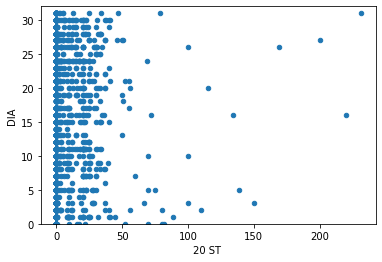

In [ ]:
var = '20 ST '
data=pd.concat([df['DIA'],df[var]],axis=1)
data.plot.scatter(x=st,y='DIA',ylim=(0,32))

In [ ]:
svc = 'SERVICIO'
data1=pd.concat([df['20 ST '],df[svc]],axis=1)
data1.head(5)

,20 ST,SERVICIO
0,1,WSA
1,31,WSA
2,7,WSA
3,0,WSA
4,0,CANCELADO


(-0.5, 31.5, 0.0, 300.0)

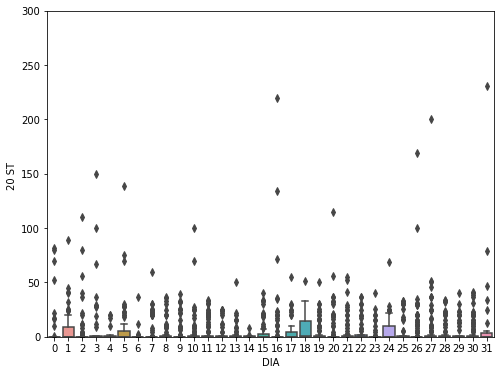

In [ ]:
f, ax=plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='DIA', y='20 ST ',data = data)
fig.axis(ymin=0,ymax=300)

In [ ]:
#Armaremos una matriz de correlación para definir las variables mas relevantes

In [ ]:
corrmat = df.corr()

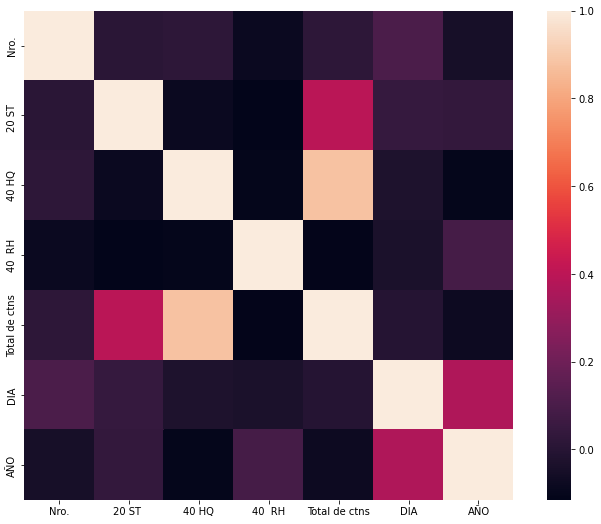

In [ ]:
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=1, square=True)

In [ ]:
k=10

In [ ]:
cols=corrmat.nlargest(k,'20 ST ')['20 ST '].index
cols

Index(['20 ST ', 'Total de ctns', 'DIA', 'AÑO', 'Nro.', '40 HQ', '40  RH'], dtype='object')

In [ ]:
cm= np.corrcoef(df[cols].values.T)
cm

array([[ 1.        ,  0.39888796,  0.04608625,  0.0338216 ,  0.01037188,
        -0.08268002, -0.1148094 ],
       [ 0.39888796,  1.        , -0.00288654, -0.07786714,  0.01791375,
         0.8798889 , -0.10660301],
       [ 0.04608625, -0.00288654,  1.        ,  0.36744115,  0.10300613,
        -0.02537749, -0.03629595],
       [ 0.0338216 , -0.07786714,  0.36744115,  1.        , -0.04614682,
        -0.10603113,  0.08937279],
       [ 0.01037188,  0.01791375,  0.10300613, -0.04614682,  1.        ,
         0.01780012, -0.08126549],
       [-0.08268002,  0.8798889 , -0.02537749, -0.10603113,  0.01780012,
         1.        , -0.10250921],
       [-0.1148094 , -0.10660301, -0.03629595,  0.08937279, -0.08126549,
        -0.10250921,  1.        ]])

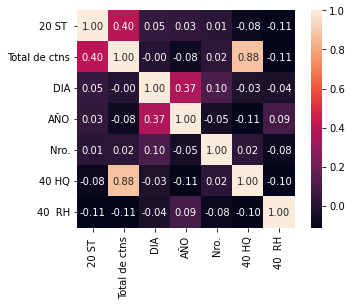

In [ ]:
hm=sns.heatmap(cm,cbar=True, annot=True, square=True, fmt=".2f",annot_kws={"size":10,},yticklabels=cols.values,xticklabels=cols.values)

In [ ]:
cols = ['20 ST ', 'Total de ctns', 'DIA', 'AÑO']

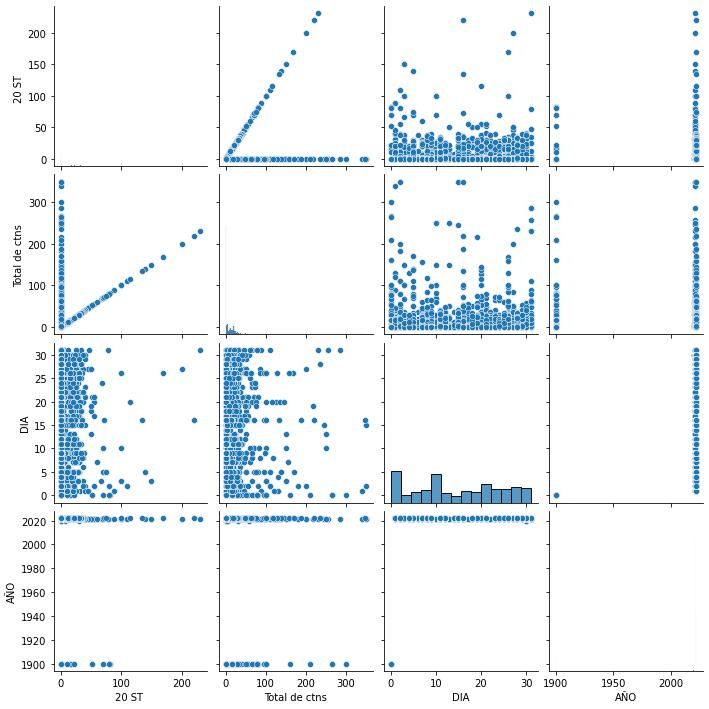

In [ ]:
sns.pairplot(df[cols], height=2.5)

In [ ]:
#Revisamos las variables que contiene el DataFrame
print(list(df))

['Nro.', 'Booking No.', 'EC', 'POL', 'POD', 'T/S Port', 'Traffic', 'Shipper', 'Broker', 'Condition', 'RF', 'DG', 'FULL', '20 ST ', '40 HQ', '40  RH', 'Total de ctns', 'WEIGHT', 'OUT DEPOT', 'IN DEPOT', 'COMMODITY', 'FECHA', 'DIA', 'MES', 'AÑO', 'VESSEL', 'VIAJE', 'SERVICIO']


In [ ]:
#Eliminamos las variables que no serán necesitarias en el analisis
df1=df.drop(['RF','DG','EC','POL','Condition','IN DEPOT'], axis=1)
df1

,Nro.,Booking No.,POD,T/S Port,Traffic,Shipper,Broker,FULL,20 ST,40 HQ,...,WEIGHT,OUT DEPOT,COMMODITY,FECHA,DIA,MES,AÑO,VESSEL,VIAJE,SERVICIO
0,1,169AA01481,JPTYO,TWKHH,FAREAST,MINSUR S. A.,C. STEINWEG (PERU) S.A.C.,FULL,1,0,...,25,IMUPESA,TIN INGOTS,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
1,2,169AA01565,CNDLC,HKHKG,FAREAST,METCO TRADING S.A.C.,C. STEINWEG (PERU) S.A.C.,FULL,31,0,...,837,NEPTUNIA,COPPER CONCENTRATES,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
2,3,169AA01855,JPYOK,TWKHH,FAREAST,MINSUR S. A.,LA HANSEATICA S.A.,FULL,7,0,...,161,NEPTUNIA,TIN INGOTS,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
3,4,169AA01911,CNYTN,CNYTN,FAREAST,WAN HAI LINES PERU SAC,WAN HAI LINES PERU SAC,MTY,0,58,...,220.4,DPW,EMPTY CONTAINER,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
4,5,169AA01912,HKHKG,HKHKG,FAREAST,RVR AGRO E.I.R.L.,RVR AGRO E.I.R.L.,FULL,0,0,...,27,NEPTUNIA,FRESH GRAPES - COLD TREATMENT,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,CANCELADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2912,169CA00706,CNWHI,CNSHA,FAREAST,EXANDAL S.A.C.,EXANDAL S.A.C.,FULL,1,0,...,18,NEPTUNIA,GOMA DE TARA,28/6/2022,28,junio,2022,XIN MEI ZHOU,W146,WS3
2911,2913,169CA00707,CLSAI,CLSAI,WAYPORT,YACZ CARGO SAC,YACZ CARGO SAC,FULL,0,1,...,44709,NEPTUNIA,BEBIDAS Y ABARROTES,16/6/2022,16,junio,2022,NATAL,W122,WS3
2912,2914,169CA00708,CLSAI,CLSAI,WAYPORT,YACZ CARGO SAC,YACZ CARGO SAC,FULL,1,0,...,44707,NEPTUNIA,GREEN COFFEE,12/6/2022,12,junio,2022,EVER ENVOY,W175,WSA
2913,2915,169CA00709,IDJKT,CNSKU,FAREAST,ZINC INDUSTRIAS NACIONALES SA,C. STEINWEG (PERU) S.A.C.,FULL,1,0,...,25,NEPTUNIA,CRUDE LEAD BLOCKS,11/6/2022,11,junio,2022,CAP ANDREAS,W010,ASA


In [ ]:
#Revisamos los datos que contiene en el DataFrame en base a filas y columnas
df_original.shape

(2915, 28)

In [ ]:
#Revisamos los datos totales que contiene en el DataFrame
df1.shape

(2915, 22)

In [ ]:
#Revisamos si el DataFrame contiene datos Null
df1.isnull()

,Nro.,Booking No.,POD,T/S Port,Traffic,Shipper,Broker,FULL,20 ST,40 HQ,...,WEIGHT,OUT DEPOT,COMMODITY,FECHA,DIA,MES,AÑO,VESSEL,VIAJE,SERVICIO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2911,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2912,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2913,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Sumamos las filas del DataFrame que contiene datos Null
df1.isnull().sum()

Nro.               0
Booking No.        0
POD              101
T/S Port         101
Traffic           68
Shipper            0
Broker             0
FULL               0
20 ST              0
40 HQ              0
40  RH             0
Total de ctns      0
WEIGHT           157
OUT DEPOT        168
COMMODITY          4
FECHA            151
DIA                0
MES                0
AÑO                0
VESSEL             0
VIAJE              0
SERVICIO         161
dtype: int64

In [ ]:
#Sumamos Todos los valores que son Nulos (0,vacíos) en el DataFrame
df1.isnull().sum().sum()

911

In [ ]:
#Se elimina todas las filas que tengan al menos un valor Nulo
df2=df1.dropna()
df2

,Nro.,Booking No.,POD,T/S Port,Traffic,Shipper,Broker,FULL,20 ST,40 HQ,...,WEIGHT,OUT DEPOT,COMMODITY,FECHA,DIA,MES,AÑO,VESSEL,VIAJE,SERVICIO
0,1,169AA01481,JPTYO,TWKHH,FAREAST,MINSUR S. A.,C. STEINWEG (PERU) S.A.C.,FULL,1,0,...,25,IMUPESA,TIN INGOTS,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
1,2,169AA01565,CNDLC,HKHKG,FAREAST,METCO TRADING S.A.C.,C. STEINWEG (PERU) S.A.C.,FULL,31,0,...,837,NEPTUNIA,COPPER CONCENTRATES,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
2,3,169AA01855,JPYOK,TWKHH,FAREAST,MINSUR S. A.,LA HANSEATICA S.A.,FULL,7,0,...,161,NEPTUNIA,TIN INGOTS,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
3,4,169AA01911,CNYTN,CNYTN,FAREAST,WAN HAI LINES PERU SAC,WAN HAI LINES PERU SAC,MTY,0,58,...,220.4,DPW,EMPTY CONTAINER,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
4,5,169AA01912,HKHKG,HKHKG,FAREAST,RVR AGRO E.I.R.L.,RVR AGRO E.I.R.L.,FULL,0,0,...,27,NEPTUNIA,FRESH GRAPES - COLD TREATMENT,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,CANCELADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2912,169CA00706,CNWHI,CNSHA,FAREAST,EXANDAL S.A.C.,EXANDAL S.A.C.,FULL,1,0,...,18,NEPTUNIA,GOMA DE TARA,28/6/2022,28,junio,2022,XIN MEI ZHOU,W146,WS3
2911,2913,169CA00707,CLSAI,CLSAI,WAYPORT,YACZ CARGO SAC,YACZ CARGO SAC,FULL,0,1,...,44709,NEPTUNIA,BEBIDAS Y ABARROTES,16/6/2022,16,junio,2022,NATAL,W122,WS3
2912,2914,169CA00708,CLSAI,CLSAI,WAYPORT,YACZ CARGO SAC,YACZ CARGO SAC,FULL,1,0,...,44707,NEPTUNIA,GREEN COFFEE,12/6/2022,12,junio,2022,EVER ENVOY,W175,WSA
2913,2915,169CA00709,IDJKT,CNSKU,FAREAST,ZINC INDUSTRIAS NACIONALES SA,C. STEINWEG (PERU) S.A.C.,FULL,1,0,...,25,NEPTUNIA,CRUDE LEAD BLOCKS,11/6/2022,11,junio,2022,CAP ANDREAS,W010,ASA


In [ ]:
#Revisamos el índice de cada columna que conforma el DaraFrame
df1.columns

Index(['Nro.', 'Booking No.', 'POD', 'T/S Port', 'Traffic', 'Shipper',
       'Broker', 'FULL', '20 ST ', '40 HQ', '40  RH', 'Total de ctns',
       'WEIGHT', 'OUT DEPOT', 'COMMODITY', 'FECHA', 'DIA', 'MES', 'AÑO',
       'VESSEL', 'VIAJE', 'SERVICIO'],
      dtype='object')

In [ ]:
df1.shape

(2915, 22)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nro.           2915 non-null   int64 
 1   Booking No.    2915 non-null   object
 2   POD            2814 non-null   object
 3   T/S Port       2814 non-null   object
 4   Traffic        2847 non-null   object
 5   Shipper        2915 non-null   object
 6   Broker         2915 non-null   object
 7   FULL           2915 non-null   object
 8   20 ST          2915 non-null   int64 
 9   40 HQ          2915 non-null   int64 
 10  40  RH         2915 non-null   int64 
 11  Total de ctns  2915 non-null   int64 
 12  WEIGHT         2758 non-null   object
 13  OUT DEPOT      2747 non-null   object
 14  COMMODITY      2911 non-null   object
 15  FECHA          2764 non-null   object
 16  DIA            2915 non-null   int64 
 17  MES            2915 non-null   object
 18  AÑO            2915 non-null

In [ ]:
df1.describe()

,Nro.,20 ST,40 HQ,40 RH,Total de ctns,DIA,AÑO
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,1458.480961,4.132419,7.099142,0.461407,11.692967,14.698456,2014.742367
std,842.074538,13.581282,26.131054,1.223260,28.279431,9.572000,27.476973
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,729.500000,0.000000,0.000000,0.000000,1.000000,7.000000,2021.000000
50%,1459.000000,0.000000,0.000000,0.000000,1.000000,15.000000,2021.000000
75%,2187.500000,1.000000,3.000000,1.000000,14.000000,24.000000,2022.000000
max,2916.000000,231.000000,350.000000,30.000000,350.000000,31.000000,2022.000000


Con la desviación estandar (std) podemos ver que tan dispersos estàn los datos

In [ ]:
#Filtramos solo las filas con "FULL" y descartamos aquellas que indican "MTY"
FULLL=["FULL"]
df2=df1[df['FULL'].isin(FULLL)]
df2

,Nro.,Booking No.,POD,T/S Port,Traffic,Shipper,Broker,FULL,20 ST,40 HQ,...,WEIGHT,OUT DEPOT,COMMODITY,FECHA,DIA,MES,AÑO,VESSEL,VIAJE,SERVICIO
0,1,169AA01481,JPTYO,TWKHH,FAREAST,MINSUR S. A.,C. STEINWEG (PERU) S.A.C.,FULL,1,0,...,25,IMUPESA,TIN INGOTS,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
1,2,169AA01565,CNDLC,HKHKG,FAREAST,METCO TRADING S.A.C.,C. STEINWEG (PERU) S.A.C.,FULL,31,0,...,837,NEPTUNIA,COPPER CONCENTRATES,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
2,3,169AA01855,JPYOK,TWKHH,FAREAST,MINSUR S. A.,LA HANSEATICA S.A.,FULL,7,0,...,161,NEPTUNIA,TIN INGOTS,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,WSA
4,5,169AA01912,HKHKG,HKHKG,FAREAST,RVR AGRO E.I.R.L.,RVR AGRO E.I.R.L.,FULL,0,0,...,27,NEPTUNIA,FRESH GRAPES - COLD TREATMENT,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,CANCELADO
5,6,169AA01913,HKHKG,HKHKG,FAREAST,RVR AGRO E.I.R.L.,RVR AGRO E.I.R.L.,FULL,0,0,...,27,NEPTUNIA,FRESH GRAPES - COLD TREATMENT,30/12/2020,30,diciembre,2020,XIN YA ZHOU,W145,CANCELADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2912,169CA00706,CNWHI,CNSHA,FAREAST,EXANDAL S.A.C.,EXANDAL S.A.C.,FULL,1,0,...,18,NEPTUNIA,GOMA DE TARA,28/6/2022,28,junio,2022,XIN MEI ZHOU,W146,WS3
2911,2913,169CA00707,CLSAI,CLSAI,WAYPORT,YACZ CARGO SAC,YACZ CARGO SAC,FULL,0,1,...,44709,NEPTUNIA,BEBIDAS Y ABARROTES,16/6/2022,16,junio,2022,NATAL,W122,WS3
2912,2914,169CA00708,CLSAI,CLSAI,WAYPORT,YACZ CARGO SAC,YACZ CARGO SAC,FULL,1,0,...,44707,NEPTUNIA,GREEN COFFEE,12/6/2022,12,junio,2022,EVER ENVOY,W175,WSA
2913,2915,169CA00709,IDJKT,CNSKU,FAREAST,ZINC INDUSTRIAS NACIONALES SA,C. STEINWEG (PERU) S.A.C.,FULL,1,0,...,25,NEPTUNIA,CRUDE LEAD BLOCKS,11/6/2022,11,junio,2022,CAP ANDREAS,W010,ASA


In [ ]:
#Revisamos el columnas que conforman el DaraFrame
print(list(df2))

['Nro.', 'Booking No.', 'POD', 'T/S Port', 'Traffic', 'Shipper', 'Broker', 'FULL', '20 ST ', '40 HQ', '40  RH', 'Total de ctns', 'WEIGHT', 'OUT DEPOT', 'COMMODITY', 'FECHA', 'DIA', 'MES', 'AÑO', 'VESSEL', 'VIAJE', 'SERVICIO']


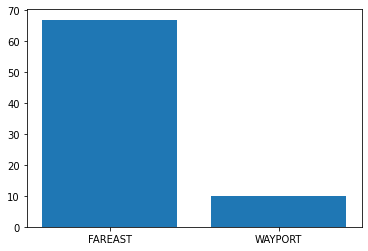

In [ ]:
plt.bar(df2["Traffic"],df2["Total de ctns"])
plt.show()

In [ ]:
#Analizamos la cantidad de contenedores 20 ST embarcados por servicio
table20st= pd.pivot_table(df2,index=['AÑO'],columns=['SERVICIO'], values=['20 ST '], aggfunc = "count")
table20st

Text(0.5, 1.0, 'Contenedores 20 ST por servicio')

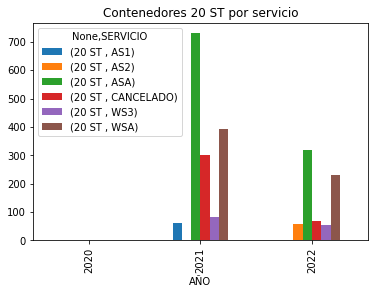

In [ ]:
table20st.plot(kind='bar')
plt.title('Contenedores 20 ST por servicio')

In [ ]:
#Analizamos la cantidad de contenedores 40 HC embarcados por servicio
table40hq= pd.pivot_table(df2,index=['AÑO'],columns=['SERVICIO'], values=['40 HQ'], aggfunc = "count")
table40hq

40 HQ                                    
SERVICIO   AS1   AS2    ASA CANCELADO   WS3    WSA
AÑO                                               
2020       NaN   NaN    NaN       2.0   NaN    3.0
2021      62.0   NaN  730.0     300.0  83.0  393.0
2022       NaN  57.0  317.0      68.0  54.0  229.0

Text(0.5, 1.0, 'Contenedores 40 HQ por servicio')

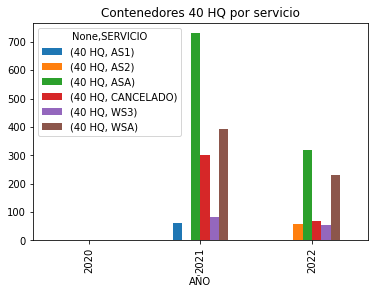

In [ ]:
table40hq.plot(kind='bar')
plt.title('Contenedores 40 HQ por servicio')

In [ ]:
#Analizamos la cantidad de contenedores 40 RH embarcados por servicio
table40rh= pd.pivot_table(df2,index=['AÑO'],columns=['SERVICIO'], values=['40  RH'], aggfunc = "count")
table40rh

40  RH                                    
SERVICIO    AS1   AS2    ASA CANCELADO   WS3    WSA
AÑO                                                
2020        NaN   NaN    NaN       2.0   NaN    3.0
2021       62.0   NaN  730.0     300.0  83.0  393.0
2022        NaN  57.0  317.0      68.0  54.0  229.0

Text(0.5, 1.0, 'Contenedores 40 RF por servicio')

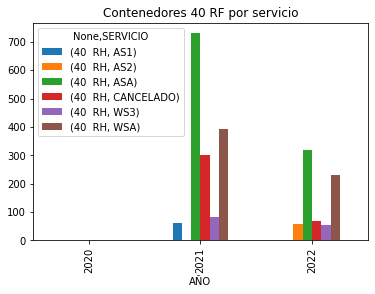

In [ ]:
table40rh.plot(kind='bar');
plt.title('Contenedores 40 RF por servicio')

In [ ]:
#Analizamos la cantidad de contenedores embarcados por Vessel (Nave): Cap Andreas
REDENDE=["CAP ANDREAS"]
CAPANDREAS=df2[df['VESSEL'].isin(REDENDE)]
CAPANDREAS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Nro.,Booking No.,EC,POL,POD,T/S Port,Traffic,Shipper,Broker,Condition,...,OUT DEPOT,IN DEPOT,COMMODITY,FECHA,DIA,MES,AÑO,VESSEL,VIAJE,SERVICIO
17,18,169AA01655,AL,PEPAI,KRPUS,KRPUS,FAREAST,IMPORT AND EXPORT DEL MAR S.A.C.,PERU BROKER S.A.,PREPAID,...,ALCONSA,TPE DIRECTO A PUERTO,FROZEN GIANT SQUID,9/1/2021,9,enero,2021,CAP ANDREAS,W003,CANCELADO
21,22,169AA01697,GM,PECLL,GTPRQ,MXZLO,WAYPORT,INTERNATIONAL FORWARDER SAC,INTERNATIONAL FORWARDER SAC,PREPAID,...,NEPTUNIA,DPW DIRECTO A PUERTO,"PRODUCTOS PARA EL HOGAR, ROPA",2/1/2021,2,enero,2021,CAP ANDREAS,W003,ASA
26,27,169AA01725,AL,PEPAI,KRPUS,KRPUS,FAREAST,SEPTEM TRADE S.A.,REALTIME,COLLECT,...,NEPTUNIA,TPE DIRECTO A PUERTO,FRESH MANGOES,9/1/2021,9,enero,2021,CAP ANDREAS,W003,CANCELADO
30,31,169AA01757,GM,PECLL,MXZLO,MXZLO,FAREAST,PROCESADORA LARAN SAC,PLEX S.A.C.,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,2/1/2021,2,enero,2021,CAP ANDREAS,W003,ASA
31,32,169AA01758,GM,PECLL,IDSUB,CNSKU,FAREAST,PROCESADORA LARAN SAC,PLEX S.A.C.,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,2/1/2021,2,enero,2021,CAP ANDREAS,W003,CANCELADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,2904,169CA00697,GM,PECLL,CNSKU,CNSKU,FAREAST,SUPREME FRUITS S.A.C.,REAL TIME,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH AVOCADOS - ATMOSFERA CONTROLADA,11/6/2022,11,junio,2022,CAP ANDREAS,W010,ASA
2903,2905,169CA00698,GM,PECLL,CNSKU,CNSKU,FAREAST,CONSORCIO Y ASOCIADOS LOS FRUTALES S.A.C.,REAL TIME,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH AVOCADOS - ATMOSFERA CONTROLADA,11/6/2022,11,junio,2022,CAP ANDREAS,W010,ASA
2905,2907,169CA00700,GM,PECLL,CNSKU,CNSKU,FAREAST,CORPORACION AGRICOLA FAMFRUITS PERU S.A.C.,REAL TIME,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH AVOCADOS - ATMOSFERA CONTROLADA,11/6/2022,11,junio,2022,CAP ANDREAS,W010,ASA
2913,2915,169CA00709,GM,PECLL,IDJKT,CNSKU,FAREAST,ZINC INDUSTRIAS NACIONALES SA,C. STEINWEG (PERU) S.A.C.,PREPAID,...,NEPTUNIA,DPW DIRECTO A PUERTO,CRUDE LEAD BLOCKS,11/6/2022,11,junio,2022,CAP ANDREAS,W010,ASA


In [ ]:
#Analizamos la cantidad total de contenedores embarcados por Nave 
#Filtramos CAP ANDREAS en la columna VESSEL
table1= pd.pivot_table(CAPANDREAS,index=['AÑO'],columns=['VIAJE'], values=['Total de ctns'], aggfunc = "count")
table1

Total de ctns                                          
VIAJE          W003  W004  W005  W006  W007  W008  W009  W010
AÑO                                                          
2021           99.0  13.0  34.0  26.0  21.0   NaN   NaN   NaN
2022            NaN   NaN   NaN   NaN   NaN  20.0  16.0  11.0

Text(0.5, 1.0, 'Total Contenedores embarcados en la nave CAP ANDREAS')

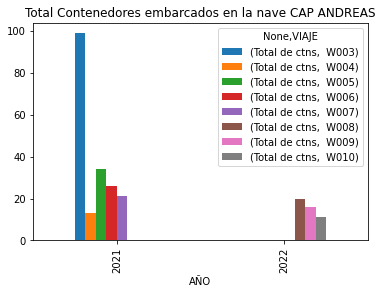

In [ ]:
table1.plot(kind='bar');
plt.title('Total Contenedores embarcados en la nave CAP ANDREAS')

In [ ]:
#Analizamos la cantidad de contenedores embarcados por Vessel (Nave)
#Filtramos Ym Utility en la columna VESSEL
YM=["YM UTILITY"]
YMU=df2[df['VESSEL'].isin(YM)]
YMU

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Nro.,Booking No.,EC,POL,POD,T/S Port,Traffic,Shipper,Broker,Condition,...,OUT DEPOT,IN DEPOT,COMMODITY,FECHA,DIA,MES,AÑO,VESSEL,VIAJE,SERVICIO
312,313,169BA00092,GM,PECLL,CNJIA,TWKHH,FAREAST,PESQUERA EXALMAR S.A.A.,PERU BROKER S.A.,PREPAID,...,IMUPESA,TBC,FISHMEAL,24/2/2021,24,febrero,2021,YM UTILITY,W070,WSA
502,503,169BA00282,AL,PECLL,CNSHA,CNSHA,FAREAST,AUSTRAL GROUP S.A.A.,AUSTRAL GROUP S.A.A.,PREPAID,...,IMUPESA,TPP,FISHMEAL,24/2/2021,24,febrero,2021,YM UTILITY,W070,WSA
655,656,169BA00435,GM,PECLL,KRINC,TWKHH,FAREAST,NEXA RESOURCES PERU S.A.A.,C. STEINWEG (PERU) S.A.C.,PREPAID,...,NEPTUNIA,MEDLOG,ZINC REFINED,24/2/2021,24,febrero,2021,YM UTILITY,W070,WSA
658,659,169BA00438,AL,PECLL,HKHKG,HKHKG,FAREAST,RVR AGRO E.I.R.L.,RVR AGRO E.I.R.L.,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,24/2/2021,24,febrero,2021,YM UTILITY,W070,WSA
662,663,169BA00442,AL,PECLL,HKHKG,HKHKG,FAREAST,RVR AGRO E.I.R.L.,RVR AGRO E.I.R.L.,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,24/2/2021,24,febrero,2021,YM UTILITY,W070,WSA
668,669,169BA00448,AL,PECLL,TWKEL,TWKHH,FAREAST,RVR AGRO E.I.R.L.,RVR AGRO E.I.R.L.,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,24/2/2021,24,febrero,2021,YM UTILITY,W070,WSA
701,702,169BA00481,AL,PECLL,TWKHH,TWKHH,FAREAST,BON VOYAGE LOGISTICS PERU S.A.C.,PERU BROKER S.A.,PREPAID,...,NEPTUNIA,TBC,FISHMEAL,5/5/2021,5,mayo,2021,YM UTILITY,W071,WSA
812,813,169BA00592,GM,PECLL,CNLYG,TWKHH,FAREAST,TRAFIGURA PERU S.A.C.,IMPALA TERMINALS PERU,PREPAID,...,NEPTUNIA,IMPALA TERMINALS,LEAD CONCENTRATES,5/5/2021,5,mayo,2021,YM UTILITY,W071,WSA
902,903,169BA00682,AL,PECLL,CNSHA,CNSHA,FAREAST,CHAVARRI EXPOIMPO S.A.C.,REALTIME,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH AVOCADO - CA,5/5/2021,5,mayo,2021,YM UTILITY,W071,CANCELADO
928,929,169BA00708,GM,PECLL,KRKWY,TWKHH,FAREAST,METCO TRADING S.A.C.,C. STEINWEG (PERU) S.A.C.,PREPAID,...,NEPTUNIA,IMPALA TERMINALS,COPPER CONCENTRATES,5/5/2021,5,mayo,2021,YM UTILITY,W071,WSA


In [ ]:
table2= pd.pivot_table(YMU,index=['AÑO'],columns=['VIAJE'], values=['Total de ctns'], aggfunc = "count")
table2

Total de ctns                              
VIAJE          W070  W071  W072  W073  W074  W076
AÑO                                              
2021            6.0   9.0   5.0  12.0   8.0   NaN
2022            NaN   NaN   NaN   NaN   NaN   8.0

Text(0.5, 1.0, 'Total Contenedores embarcados en la nave YM UTILITY')

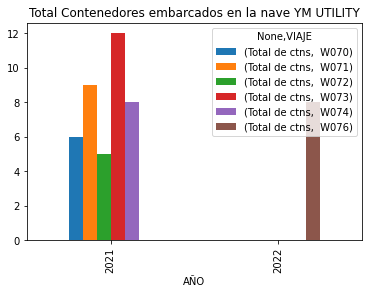

In [ ]:
table2.plot(kind='bar')
plt.title('Total Contenedores embarcados en la nave YM UTILITY')

In [ ]:
#Analizamos la cantidad de contenedores embarcados por Vessel (Nave)
#Filtramos XIN YA ZHOU en la columna VESSEL
XF=["XIN FU ZHOU"]
XFZ=df2[df['VESSEL'].isin(XF)]
XFZ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Nro.,Booking No.,EC,POL,POD,T/S Port,Traffic,Shipper,Broker,Condition,...,OUT DEPOT,IN DEPOT,COMMODITY,FECHA,DIA,MES,AÑO,VESSEL,VIAJE,SERVICIO
305,306,169BA00085,GM,PECLL,CNJIA,TWKHH,FAREAST,PESQUERA EXALMAR S.A.A.,PERU BROKER S.A.,PREPAID,...,IMUPESA,TBC,FISHMEAL,20/2/2021,20,febrero,2021,XIN FU ZHOU,W064,ASA
384,385,169BA00164,AL,PECLL,CNSHA,CNSHA,FAREAST,PESQUERA CANTABRIA S.A.,MSICERES SAC,PREPAID,...,IMUPESA,TBC,FISHMEAL,20/2/2021,20,febrero,2021,XIN FU ZHOU,W064,ASA
444,445,169BA00224,GM,PECLL,CNLYG,CNNGB,FAREAST,INVERSIONES ANTAÑA S.A.C.,C. STEINWEG (PERU) S.A.C.,PREPAID,...,NEPTUNIA,DPW DIRECTO A PUERTO,ZINC CONCENTRATES,20/2/2021,20,febrero,2021,XIN FU ZHOU,W064,ASA
487,488,169BA00267,AL,PECLL,GTPRQ,MXZLO,WAYPORT,INKABOR S.A.C.,INKABOR S.A.C.,PREPAID,...,NEPTUNIA,SAKJ DEPOT,DEMAS BORATOS,20/2/2021,20,febrero,2021,XIN FU ZHOU,W064,ASA
491,492,169BA00271,GR,PECLL,THLCH,TWKHH,FAREAST,EXPORTADORA SAFCO PERU S.A.,UNITED CARGO PERU,PREPAID,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,20/2/2021,20,febrero,2021,XIN FU ZHOU,W064,CANCELADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,2394,169CA00185,GM,PECLL,CNSHA,CNSHA,FAREAST,AGRICOLA ANDREA S.A.C.,AGRICOLA ANDREA S.A.C.,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,12/2/2022,12,febrero,2022,XIN FU ZHOU,W069,ASA
2393,2395,169CA00186,GR,PECLL,HKHKG,HKHKG,FAREAST,UVICA SAC,PORT LOGISTICS S.A.C.,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,12/2/2022,12,febrero,2022,XIN FU ZHOU,W069,ASA
2394,2396,169CA00187,GR,PECLL,HKHKG,HKHKG,FAREAST,UVICA SAC,PORT LOGISTICS S.A.C.,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,12/2/2022,12,febrero,2022,XIN FU ZHOU,W069,ASA
2395,2397,169CA00188,GR,PECLL,HKHKG,HKHKG,FAREAST,EXPORTADORA SAFCO PERU S.A.,UNITED CARGO PERU,COLLECT,...,NEPTUNIA,DPW DIRECTO A PUERTO,FRESH GRAPES - COLD TREATMENT,12/2/2022,12,febrero,2022,XIN FU ZHOU,W069,ASA


In [ ]:
table3= pd.pivot_table(XFZ,index=['AÑO'],columns=['VIAJE'], values=['Total de ctns'], aggfunc = "count")
table3

Total de ctns                              
VIAJE          W064  W065  W067  W068  W069  W070
AÑO                                              
2021           29.0   8.0   3.0   6.0   NaN   NaN
2022            NaN   NaN   NaN   NaN  16.0   1.0

Text(0.5, 1.0, 'Total Contenedores embarcados en la nave XIN FU ZHOU')

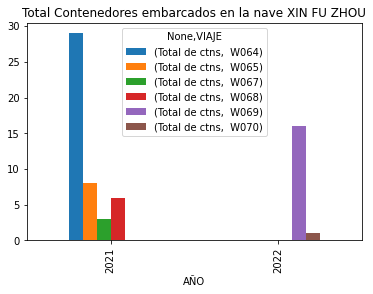

In [ ]:
table3.plot(kind='bar')
plt.title('Total Contenedores embarcados en la nave XIN FU ZHOU')

In [ ]:
#Analizamos la cantidad de contenedores embarcados mensualmente por Vessel (Nave)
#De la tabla CAP ANDREAS contamos los contenedores embarcados por mes en cada viaje
table4= pd.pivot_table(CAPANDREAS,index=['MES'],columns=['VIAJE'], values=['Total de ctns'], aggfunc = "count")
table4

Total de ctns                                          
VIAJE               W003  W004  W005  W006  W007  W008  W009  W010
MES                                                               
agosto               NaN   NaN   NaN   3.0   NaN   NaN   NaN   NaN
enero               99.0   NaN   NaN   NaN   NaN  20.0   NaN   NaN
junio                NaN   NaN  34.0   NaN   NaN   NaN   NaN  11.0
marzo                NaN  13.0   NaN   NaN   NaN   NaN  16.0   NaN
noviembre            NaN   NaN   NaN   NaN  21.0   NaN   NaN   NaN
septiembre           NaN   NaN   NaN  23.0   NaN   NaN   NaN   NaN

Text(0.5, 1.0, 'Total Contenedores embarcados por mes en cada viaje de la nave CAP ANDREAS')

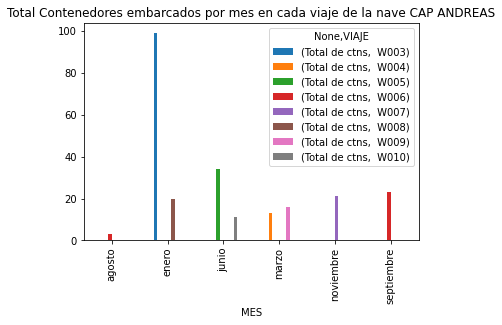

In [ ]:
table4.plot(kind='bar');
plt.title('Total Contenedores embarcados por mes en cada viaje de la nave CAP ANDREAS')

In [ ]:
#Analizamos la cantidad de contenedores embarcados mensualmente por Vessel (Nave)
#De la tabla YMU contamos los contenedores embarcados por mes en cada viaje
table5= pd.pivot_table(YMU,index=['MES'],columns=['VIAJE'], values=['Total de ctns'], aggfunc = "count")
table5

Total de ctns                              
VIAJE              W070  W071  W072  W073  W074  W076
MES                                                  
diciembre           NaN   NaN   NaN   NaN   8.0   NaN
febrero             6.0   NaN   NaN   NaN   NaN   NaN
julio               NaN   NaN   5.0   NaN   NaN   NaN
mayo                NaN   9.0   NaN   NaN   NaN   8.0
octubre             NaN   NaN   NaN  12.0   NaN   NaN

Text(0.5, 1.0, 'Total Contenedores embarcados por mes en cada viaje de la nave YM UTILITY')

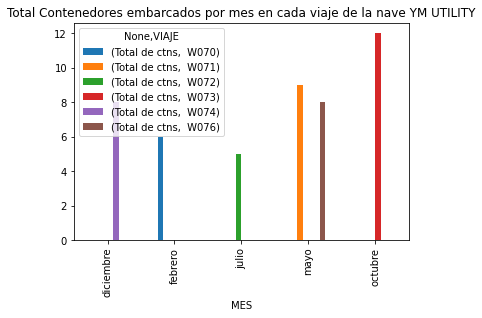

In [ ]:
table5.plot(kind='bar')
plt.title('Total Contenedores embarcados por mes en cada viaje de la nave YM UTILITY')

In [ ]:
#Analizamos la cantidad de contenedores embarcados mensualmente por Vessel (Nave)
#De la tabla XIN FU ZHOU contamos los contenedores embarcados por mes en cada viaje
table6= pd.pivot_table(XFZ,index=['MES'],columns=['VIAJE'], values=['Total de ctns'], aggfunc = "count")
table6

Total de ctns                              
VIAJE               W064  W065  W067  W068  W069  W070
MES                                                   
abril                NaN   NaN   NaN   NaN   NaN   1.0
diciembre            NaN   NaN   NaN   6.0   NaN   NaN
febrero             29.0   NaN   NaN   NaN  16.0   NaN
mayo                 NaN   8.0   NaN   NaN   NaN   NaN
septiembre           NaN   NaN   3.0   NaN   NaN   NaN

Text(0.5, 1.0, 'Total Contenedores embarcados por mes en cada viaje de la nave XIN FU ZHOU')

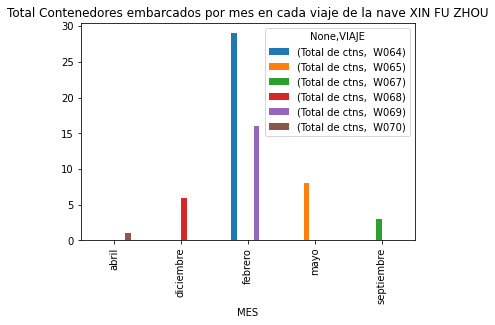

In [ ]:
table6.plot(kind='bar')
plt.title('Total Contenedores embarcados por mes en cada viaje de la nave XIN FU ZHOU')

In [ ]:
#Revisamos el contenido de la Base de Datos principal
dfNEP_original=pd.read_csv("/content/AsignacionesNEPTUNIA.csv",encoding='latin1',sep=';')
dfNEP=pd.read_csv("/content/AsignacionesNEPTUNIA.csv",encoding='latin1',sep=';')
dfNEP.head()

,CONTENEDOR,NAVE,VIAJE,Asignacion,DIA,MES,AÑO,MERCANCIA,BOOKING,Fecha ETA,Tiempo Libre,SOBREESTADIA
0,20 ST,EVER LOYAL,W054,07/06/2022,7,junio,2022,ACIDO BORICO,169CA00654,15/06/2022,12,8
1,20 ST,EVER LOYAL,W054,08/06/2022,8,junio,2022,SILVER CONCENTRATES,169CA00637,15/06/2022,12,7
2,20 ST,EVER LOYAL,W054,07/06/2022,7,junio,2022,SILVER CONCENTRATES,169CA00637,15/06/2022,12,8
3,20 ST,EVER LOYAL,W054,11/06/2022,14,junio,2022,CARGA GENERAL,169CA00744,15/06/2022,12,4
4,40 HC,EVER LOYAL,W054,11/06/2022,14,junio,2022,CARGA GENERAL,169CA00747,15/06/2022,12,4


In [ ]:
#Revisamos el contenido de la Base de Datos principal
dfIMU_original=pd.read_csv("/content/AsignacionesIMUPESA.csv",encoding='latin1',sep=';')
dfIMU=pd.read_csv("/content/AsignacionesIMUPESA.csv",encoding='latin1',sep=';')
dfIMU.head()

,Contenedor,Nave,Viaje,F.Asignación,Dia,Mes,Año,Booking,Cliente,Fecha ETA,Tiempo libre,Sobreestadía
0,40 HC,XIN TAI CANG ...,W261,03/05/2022,3.0,mayo,2022.0,169CA00529,AIRSEALOGISTICS SAC ...,07/05/2022,12.0,4.0
1,40 HC,SEASPAN OCEANIA ...,W029,10/05/2022,10.0,mayo,2022.0,169CA00590,K LINE PERU S.A.C. ...,14/05/2022,12.0,4.0
2,40 HC,SEASPAN OCEANIA ...,W029,11/05/2022,11.0,mayo,2022.0,169CA00540,AIRSEALOGISTICS SAC ...,14/05/2022,12.0,3.0
3,20 ST,KOTA PURI ...,W021,14/05/2022,14.0,mayo,2022.0,169CA00552,OPTAMINE S.A.C. ...,25/05/2022,12.0,11.0
4,20 ST,KOTA PURI ...,W021,16/05/2022,16.0,mayo,2022.0,169CA00551,OPTAMINE S.A.C. ...,25/05/2022,12.0,9.0


In [ ]:
#Revisamos el contenido de la Base de Datos principal
dfNAV_original=pd.read_csv("/content/NAVES.csv",encoding='latin1',sep=';')
dfNAV=pd.read_csv("/content/NAVES.csv",encoding='latin1',sep=';')
dfNAV.head()

,WEEK,ETA PECLL,VESSEL,VIAJE,SERVICIO,CODE,OP,STS,SKD,DELAY,OBS,YEAR
0,27.0,01-jul,KOTA LUKIS,W101,AS1,W101CKLK,WHL,NaN,03-jul,2.0,julio,2021.0
1,27.0,03-jul,SEASPAN HUDSON,W010,WSA3,W010JCDS,COSCO,NaN,11-jul,8.0,julio,2021.0
2,27.0,03-jul,KOTA CANTIK,W062,ASA,W062JKCT,PIL,NaN,-,0.0,-,0.0
3,28.0,07-jul,EVER LOADING,W044,WSA,W044JELG,EMC,NaN,14-jul,7.0,julio,2021.0
4,28.0,08-jul,WAN HAI 329,W002,AS1,W00232H,WHL,NaN,-,0.0,-,0.0
